In [1]:
%matplotlib inline

In [2]:
from data_management import get_data

gx_volume = get_data()

In [3]:
gx_volume

,Unnamed: 0,country,brand,volume,month_num,month_name,therapeutic_area,channel,channel_rate,presentation,num_generics,volume_1,ratio
0,1,country_1,brand_3,18509088.6,-88,Jul,Cardiovascular_Metabolic,B,1.189704,PILL,3,12056281.2,1.535224
1,1,country_1,brand_3,18509088.6,-88,Jul,Cardiovascular_Metabolic,B,1.189704,PILL,3,12056281.2,1.535224
2,1,country_1,brand_3,18509088.6,-88,Jul,Cardiovascular_Metabolic,D,98.810296,PILL,3,12056281.2,1.535224
3,1,country_1,brand_3,18509088.6,-88,Jul,Cardiovascular_Metabolic,D,98.810296,PILL,3,12056281.2,1.535224
4,2,country_1,brand_3,19697508.0,-87,Aug,Cardiovascular_Metabolic,B,1.189704,PILL,3,12056281.2,1.633796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480886,94846,country_16,brand_389,1971190.0,-1,Feb,Cardiovascular_Metabolic,C,0.436912,PILL,1,1971190.0,1.000000
480887,94846,country_16,brand_389,1971190.0,-1,Feb,Cardiovascular_Metabolic,C,0.436912,PILL,1,1971190.0,1.000000
480888,94846,country_16,brand_389,1971190.0,-1,Feb,Cardiovascular_Metabolic,D,98.214315,PILL,1,1971190.0,1.000000
480889,94846,country_16,brand_389,1971190.0,-1,Feb,Cardiovascular_Metabolic,D,98.214315,PILL,1,1971190.0,1.000000


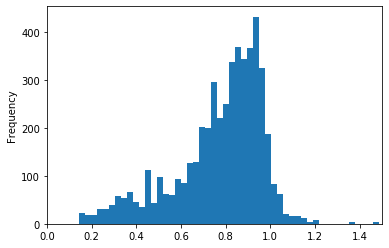

In [4]:
gx_volume[gx_volume['month_num'] == 0]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

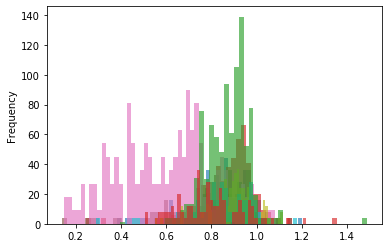

In [5]:
gx_volume[gx_volume['month_num'] == 0].groupby('country')['ratio'].plot.hist(bins=50, alpha=0.65);

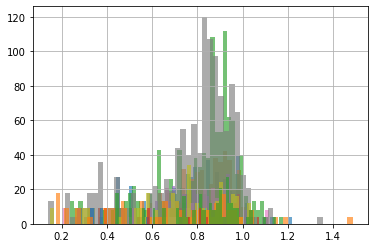

In [6]:
gx_volume[gx_volume['month_num'] == 0].groupby('therapeutic_area')['ratio'].hist(bins=50, alpha=0.65);

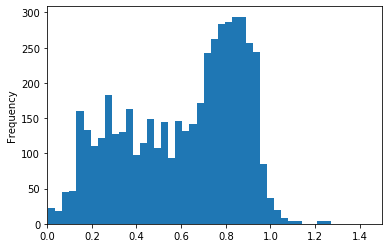

In [7]:
gx_volume[gx_volume['month_num'] == 2]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

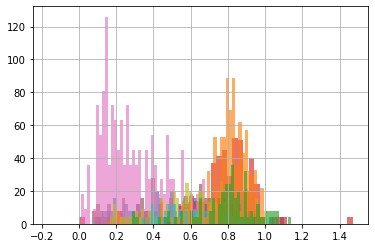

In [8]:
ax = gx_volume[gx_volume['month_num'] == 3].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

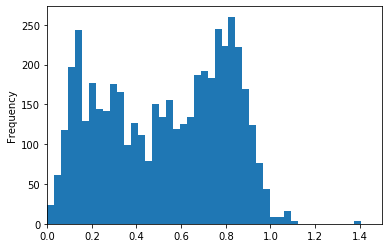

In [9]:
gx_volume[gx_volume['month_num'] == 5]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

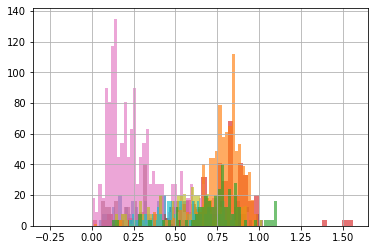

In [88]:
ax = gx_volume[gx_volume['month_num'] == 5].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

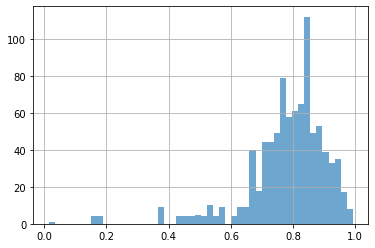

In [99]:
ax = gx_volume[(gx_volume['month_num'] == 5) & (gx_volume['country'] == 'country_7')].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

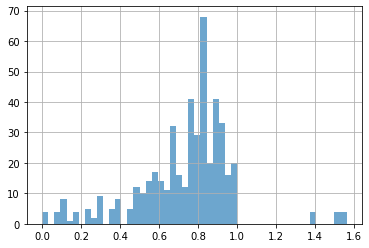

In [104]:
ax = gx_volume[(gx_volume['month_num'] == 5) & (gx_volume['country'] == 'country_12')].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

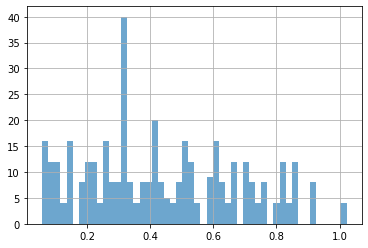

In [109]:
ax = gx_volume[(gx_volume['month_num'] == 5) & (gx_volume['country'] == 'country_15')].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

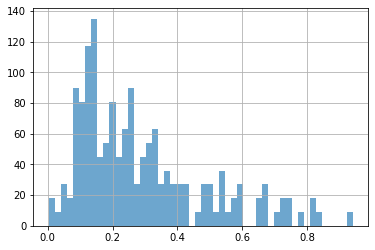

In [110]:
ax = gx_volume[(gx_volume['month_num'] == 5) & (gx_volume['country'] == 'country_16')].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

<AxesSubplot:ylabel='Frequency'>

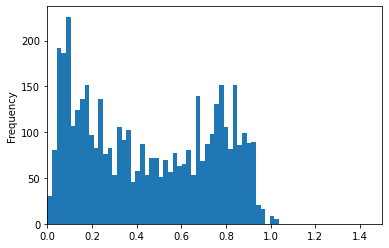

In [66]:
gx_volume[gx_volume['month_num'] == 11]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

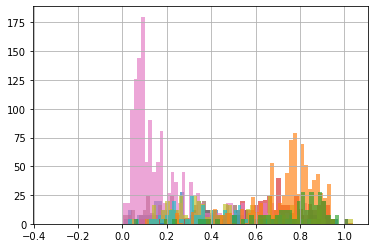

In [89]:
ax = gx_volume[gx_volume['month_num'] == 11].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

<AxesSubplot:ylabel='Frequency'>

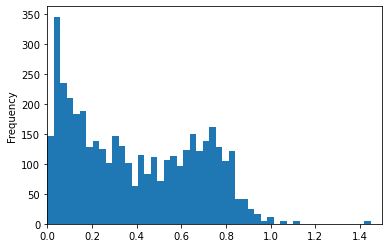

In [68]:
gx_volume[gx_volume['month_num'] == 17]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

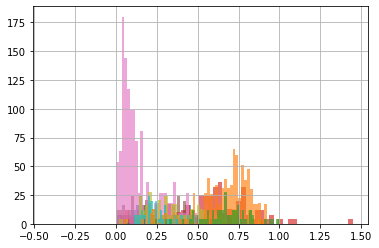

In [90]:
ax = gx_volume[gx_volume['month_num'] == 17].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

<AxesSubplot:ylabel='Frequency'>

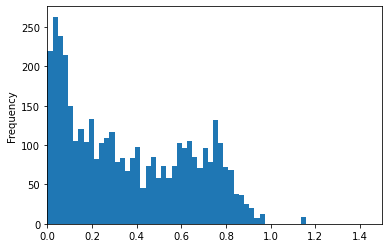

In [70]:
gx_volume[gx_volume['month_num'] == 23]['ratio'].plot.hist(bins=50, xlim=(0, 1.5))

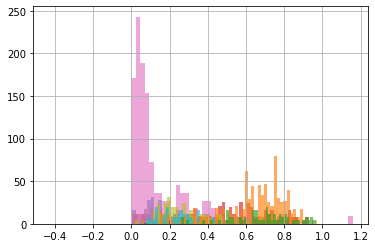

In [91]:
ax = gx_volume[gx_volume['month_num'] == 23].groupby('country')['ratio'].hist(bins=50, alpha=0.65);

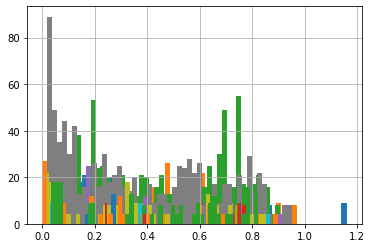

In [72]:
gx_volume[gx_volume['month_num'] == 23].groupby('therapeutic_area')['ratio'].hist(bins=50, alpha=0.65);

<AxesSubplot:>

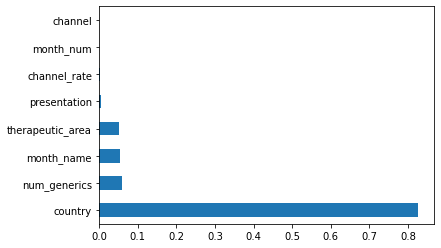

In [77]:
# Caracterizamos Admission Time
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import preprocessing
import pandas as pd

le = preprocessing.LabelEncoder()

data_X = gx_volume[gx_volume['month_num'] == 23].drop(['ratio', 'brand', 'volume', 'volume_1'], axis=1)

data_X.country = le.fit(data_X.country.unique()).transform(data_X.country)
data_X.presentation = le.fit(data_X.presentation.unique()).transform(data_X.presentation)
data_X.month_name = le.fit(data_X.month_name.unique()).transform(data_X.month_name)
data_X.therapeutic_area = le.fit(data_X.therapeutic_area.unique()).transform(data_X.therapeutic_area)
data_X.channel = le.fit(data_X.channel.unique()).transform(data_X.channel)


data_Y = gx_volume[gx_volume['month_num'] == 23]['ratio']

decision_tree = DecisionTreeRegressor(random_state=0, max_depth=5)
decision_tree = decision_tree.fit(data_X, data_Y)
feat_importances = pd.Series(decision_tree.feature_importances_, index=data_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
